<a href="https://colab.research.google.com/github/Fellylove/bioinformatics_algorithms_coursera/blob/master/week1_module1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Practical: Downloading and parsing a genome

In [1]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=8b5272def96fcb087e94588a0cb353d30c9dca702915fef9f41cdc5982610ca1
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2022-01-21 01:33:27--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.32.84.71, 13.32.84.231, 13.32.84.169, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.32.84.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa’

lambda_virus.fa     100%[===================>]  48.12K  --.-KB/s    in 0.02s   

2022-01-21 01:33:27 (2.23 MB/s) - ‘lambda_virus.fa’ saved [49270/49270]



In [3]:
#read genome from fasta read

def  readGenome (filename):
  genome = ''
  with open(filename, 'r') as f:
    for line in f:
      if not line[0] == '>':
        genome += line.rstrip()
  return genome

In [4]:
genome = readGenome('lambda_virus.fa')

In [12]:
len(genome)

48502

In [13]:
from collections import Counter

count = Counter(genome)
print(count)

Counter({'G': 12820, 'A': 12334, 'T': 11986, 'C': 11362})


In [16]:
#another method of counting is iteratively

#initianilize dictionary

counts = {'G': 0, 'A': 0, 'T':0, 'C':0}

for base in genome:
  counts[base] += 1 

print(counts)


{'G': 12820, 'A': 12334, 'T': 11986, 'C': 11362}


##sequencing reads in FASTQ format

In [38]:
def QtoPhred33(Q):
  "Turn Q into Phred+33 ASCII-encoded quality"

  return chr(Q + 33)

def phred33ToQ(Qual):
  "Turn phred+33 ASCII-encoded quality into Q"
  return ord(Qual) -33

##practical: working with seqeuncing reads

In [17]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            #All the reads are the same length (100 bases) 
            assert len(seq) == 100
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [20]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ads1_week4_reads.fq

--2022-01-20 01:16:53--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ads1_week4_reads.fq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.224.2.178, 13.224.2.74, 13.224.2.8, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.224.2.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 395781 (387K) [video/m2ts]
Saving to: ‘ads1_week4_reads.fq.1’

ads1_week4_reads.fq 100%[===================>] 386.50K  --.-KB/s    in 0.03s   

2022-01-20 01:16:53 (14.7 MB/s) - ‘ads1_week4_reads.fq.1’ saved [395781/395781]



In [21]:
seqs, quals = readFastq('ads1_week4_reads.fq.1')

In [23]:
print(seqs[:5])

['GTCCAGCAGAGCAAGTGATGCGAGAGCTGCCCATCCTCCAACCAGCATGCCCCTAGACATTGACACTGCATCGGAGTCAGGCCAAGATCCGCAGGACAGT', 'GGAGTACGACTTCAGAGATCTCACTTGGTGTATCAACCCGCCAGAGAGAATCAAATTGGATTATGATCAATACTGTGCAGATGTGGCTGCTGAAGAACTC', 'GCAAATTTTGATCTCTCTTGGCTTCACAATCAATTCAACCATGACCCGAGATGTAGTCATACCCCTCCTCACAAACAACGATCTCTTAATAAGGATGGCA', 'GAGTTAATTGAAGCCCTAGATTACATTTTCATAACTGATGACATACATCTGACAGGGGAGATTTTCTCATTTTTCAGAAGTTTCGGCCACCCCAGACTTG', 'AATGACAGAGACCGCTATGACCATTGATGCTAGGTATGCAGAACTTCTAGGAAGAGTCAGATACATGTGGAAACTGATAGATGGTTTCTTCCCTGCACTC']


In [26]:
print(quals[:100])

['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

In [36]:
print(quals)

['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

In [39]:
def createHist(qualities):
  hist = [0] * 50

  for qual in qualities:
    for phred in qual:
      q = phred33ToQ(phred)
      hist[q] += 1
  return hist

h = createHist(quals)

print(h)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 188100, 0, 0, 0, 0, 0, 0, 0, 0, 0]


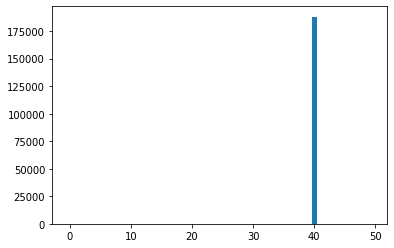

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(len(h)), h)
plt.show()

##analyzing reads by position

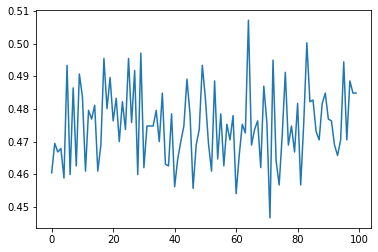

In [44]:
# find gc by position

def findGCByPos (reads):
  gc = [0] * 100
  totals = [0] * 100

  for read in reads:
    for i in range(len(read)):
      if read[i] == 'C' or read[i] == 'G':
        gc[i] += 1
      totals[i] += 1
  for i in range(len(gc)):
    if totals[i]> 0:
      gc[i] /= float(totals[i])

  return gc

gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()

In [46]:
#distribution of base in the genome seq(reads)

import collections

count = collections.Counter()
for seq in seqs:
  count.update(seq)

print(count)

Counter({'A': 54873, 'C': 44924, 'G': 44433, 'T': 43870})


##Lecture: Naive exact matching

In [47]:
t = ' there would be a word'
t.find('word')

18

In [13]:
#exact matching: naive algorithm

def naive (p, t):
  occurrences = []
  for i in range(len(t) - len(p) + 1):
    match = True
    for j in range(len(p)):
      if t[i+j] != p[j]:
        match = False
        break
    if match:
      occurrences.append(i)
  return occurrences

In [8]:
#generate reads from random positions in the given genome

import random

def generatesReads(genome, numReads, readLen):

  ''' Generate reads from random positions in the given genome'''

  reads = []
  for _ in range (numReads):
    start = random.randint(0, len(genome) - readLen) - 1
    reads.append(genome[start : start+readLen])
    return reads

In [14]:
reads = generatesReads (genome, 100, 100)

numMatched = 0
for r in reads:
  matches = naive(r, genome)
  if len(matches) > 0:
    numMatched +=  1

print ('%d/%d reads matched exactly!' % (numMatched, len(reads)))

#this is probably a short genome. the example in class gave a longer read


1/1 reads matched exactly!


In [15]:
print(reads)

['AATGCCAGAGAACTGAAGCTGGCGAACGCGGCAATTACTGACATGCAGATGCGTCAGCGTGATGTTGCTGCGCTCGATGCAAAATACACGAAGGAGTTAG']


##Practical: Matching real reads

In [18]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq

--2022-01-21 01:49:39--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.32.84.71, 13.32.84.231, 13.32.84.169, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.32.84.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254384 (248K) [audio/mpeg]
Saving to: ‘ERR266411_1.first1000.fastq’

ERR266411_1.first10 100%[===================>] 248.42K  --.-KB/s    in 0.1s    

2022-01-21 01:49:41 (2.15 MB/s) - ‘ERR266411_1.first1000.fastq’ saved [254384/254384]



In [20]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            #All the reads are the same length (100 bases) 
            assert len(seq) == 100
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [21]:
phix_read, _ = readFastq('ERR266411_1.first1000.fastq')

In [22]:
numMatched = 0
n = 0
for r in phix_read:
  #r = r[:30]  #reads shorter reads
  matches = naive(r, genome) #I am using a different genome
  #matches.extend(naive(reverseComplement(r), genome) #if we want to add the reverse complement. 
  n += 1
  if len(matches) > 0:
    numMatched += 1
print ('%d/%d reads matched the genome!' % (numMatched, n))

0/1000 reads matched the genome!


##programming homework